# **SERIES TEMPORALES:**

## 1.IMPORTAMOS LIBRERÍAS

Utilizamos el prophet model, un modelo nos sirve con poco procesamiento de las variables (solo tratamos el score y no generamos nuevas variables) y permite predecir distintos periodos a largo plazo de una sola vez.


In [ ]:
#Primer paso conectar al drive:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
### importamos librería

#analisis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#librería básica de algoritmos
from sklearn.preprocessing import LabelEncoder,MinMaxScaler 

# python core library for machine learning and data science
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer, SimpleImputer
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import xgboost

# time calculation to track some processes
import time

import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn import metrics
from math import sqrt
import matplotlib
import time
import itertools
import warnings
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
import pickle
import calendar
from sklearn import metrics
from math import sqrt
from string import punctuation
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder
import itertools
import warnings

warnings.filterwarnings("ignore")

## 2.IMPORTAMOS DATOS

In [ ]:
#VALENTINA: /content/drive/MyDrive/DATA SCIENCE/CAPSTONE/Copia de index_data__index_indics.xlsx
#LAIA: /content/drive/MyDrive/DATA SCIENCE/TEAM/Capstone/index_data__index_indics.xlsx
#LAURA: /content/drive/MyDrive/master/capstone project/index_data__index_indics-4.xlsx

In [ ]:
#LAURA: 
df_final = pd.read_csv('/content/drive/MyDrive/TEAM/Capstone/df_final')
#valentina: 
#df_final = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/df_final.csv')

In [ ]:
df_final

,Country,fulltime_employement_rate,duration_working_life,employed_in_education_health_socialactivities,flexibility_at_work,career_prospects,mean_monthly_earnings,mean_equivalised_income,risk_of_poverty,S20/S80_income,...,good_self-perceived_health,life_expectancy,healthy_life_years,no_smoking_nor_harmful_drinking,doing_sport_eating_healthy,no_medical_examination,no_dental_examination,year,Sex,Score
0,Austria,42.0,35.0,28.0,36.0,64.0,2343.0,26442.0,14.0,24.0,...,71.0,84.0,58.0,65.0,51.0,1.0,1.0,2021,W,68.00
1,Belgium,40.0,32.0,39.0,30.0,66.0,2778.0,23204.0,15.0,28.0,...,72.0,84.0,63.0,68.0,29.0,3.0,5.0,2021,W,72.70
2,Bulgaria,47.0,32.0,19.0,20.0,66.0,1078.0,10612.0,24.0,13.0,...,63.0,79.0,68.0,68.0,9.0,2.0,3.0,2021,W,59.90
3,Cyprus,49.0,34.0,19.0,17.0,53.0,1941.0,21910.0,15.0,21.0,...,77.0,84.0,63.0,81.0,33.0,2.0,5.0,2021,W,57.00
4,Czechia,49.0,33.0,25.0,11.0,61.0,1463.0,15050.0,12.0,30.0,...,61.0,82.0,63.0,73.0,30.0,3.0,3.0,2021,W,56.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,Portugal,54.5,38.5,7.0,28.0,57.0,1670.0,12984.0,18.0,16.5,...,53.0,78.0,59.0,63.0,35.0,3.5,16.0,2018,M,61.05
482,Romania,59.0,36.0,3.0,20.0,67.0,1003.0,5732.0,22.0,13.5,...,75.5,72.0,59.5,36.0,16.0,7.0,8.0,2018,M,54.50
483,Sweden,65.5,42.5,12.0,47.0,68.0,3085.0,23088.5,14.5,24.5,...,80.0,80.5,73.5,61.0,56.0,5.5,5.0,2018,M,83.75
484,Slovenia,57.0,36.5,6.0,32.0,61.0,2021.0,16596.0,12.5,28.5,...,68.5,78.0,59.0,54.0,46.0,2.0,3.0,2018,M,67.95


## 3.DATA PREPROCESSING

In [ ]:
df_series=pd.DataFrame(df_final.groupby([ "year", "Country"])["Score"].mean()).reset_index()
df_series

,year,Country,Score
0,2013,Austria,68.0
1,2013,Belgium,72.7
2,2013,Bulgaria,59.9
3,2013,Croatia,59.2
4,2013,Cyprus,57.0
...,...,...,...
238,2021,Romania,54.5
239,2021,Slovakia,56.0
240,2021,Slovenia,67.6
241,2021,Spain,73.7


In [ ]:
df_series=df_series.sort_values(by= ["Country","year"])
df_series.head(30)

,year,Country,Score
0,2013,Austria,68.00
27,2014,Austria,68.00
54,2015,Austria,68.00
81,2016,Austria,68.00
108,2017,Austria,68.00
135,2018,Austria,66.65
162,2019,Austria,65.30
189,2020,Austria,66.50
216,2021,Austria,68.00
1,2013,Belgium,72.70


In [ ]:
sns.relplot (x = 'year', y = 'Score', kind = 'line', col = 'Country', col_wrap =8
             , data=df_series, ci = None)  

Podemos observar que en muchos países el score baja en 2019, ....

In [ ]:
df_series['year'] = pd.to_datetime(df_series['year'], format="%Y")

In [ ]:
df_series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 242
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   year     243 non-null    datetime64[ns]
 1   Country  243 non-null    object        
 2   Score    243 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 15.7+ KB


In [ ]:
df_series.rename(columns={'year':'ds','Country':'main_filter','Score':'y'}, inplace= True)
df_series

,ds,main_filter,y
0,2013-01-01,Austria,68.00
27,2014-01-01,Austria,68.00
54,2015-01-01,Austria,68.00
81,2016-01-01,Austria,68.00
108,2017-01-01,Austria,68.00
...,...,...,...
134,2017-01-01,Sweden,83.90
161,2018-01-01,Sweden,83.75
188,2019-01-01,Sweden,83.60
215,2020-01-01,Sweden,83.80


## 5.PROPHET MODEL

### Train Test

In [ ]:
def run_prophet_predictions(df, nr_predictions):
    '''
    Runs a Prophet models on a different timeseries and appends the prediction to a DataFrame
    '''
    prophet_dict = {}
    prophet_predictions_df = pd.DataFrame()
    filters = df["main_filter"].unique()
    
    for filter_ in filters:
        
        print(f"Working with filter {filter_}")
        
        # get the timeseries to modelize
        timeserie = df[df["main_filter"] == filter_ ]
        timeserie = timeserie[["ds", "y"]]
        
        # model fitting
        model = Prophet()
        
        model.fit(timeserie)
        
        # make future dataframe
        future = model.make_future_dataframe(periods = nr_predictions, freq = 'Y',include_history=False)
        
        forecast = model.predict(future)
        forecast["main_filter"] = filter_
    
        # append predictions
        prophet_predictions_df = prophet_predictions_df.append(forecast)
        prophet_dict[filter_] = [model, forecast]
     
    prophet_predictions_df.to_pickle("PREDICTIONS_PROPHET.pkl")
    
    return prophet_dict

In [ ]:
prophet_dict = run_prophet_predictions(
    df = df_series, 
    nr_predictions = 10, 
)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Working with filter Austria


INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Belgium


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Bulgaria


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Croatia


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Cyprus


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Czechia


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Denmark
Working with filter Estonia


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Finland


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter France


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Germany


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Greece


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Hungary


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Ireland


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Italy


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Latvia


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Lithuania


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Luxembourg


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Malta


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Netherlands


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Poland


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Portugal


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Romania


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Slovakia


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Slovenia


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Spain


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Working with filter Sweden


In [ ]:
prophet_dict

In [ ]:
df_preds = pd.read_pickle("PREDICTIONS_PROPHET.pkl")

In [ ]:
df_preds.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,main_filter
0,2021-12-31,48.645096,69.224244,69.911432,48.316924,49.004112,20.907320,20.907320,20.907320,20.907320,20.907320,20.907320,0.0,0.0,0.0,69.552416,Austria
1,2022-12-31,49.807997,70.327914,72.867951,48.649101,51.189138,21.678813,21.678813,21.678813,21.678813,21.678813,21.678813,0.0,0.0,0.0,71.486810,Austria


In [ ]:
df_2030=(df_preds[df_preds["ds"]=="2030-12-31"])[["main_filter","yhat"]]
df_2030.rename(columns = {"main_filter":"Country","yhat":"Score_2030"}, inplace = True)
df_2030.sort_values(by= ['Score_2030'], ascending=False)


,Country,Score_2030
9,Spain,92.485616
9,Finland,87.632994
9,Sweden,85.942764
9,Luxembourg,84.379417
9,Ireland,82.225853
9,Austria,80.796391
9,Netherlands,80.108178
9,France,80.090448
9,Denmark,77.292045
9,Belgium,76.491185


### Medición Error

In [ ]:
error_1= (df_series[df_series["ds"]=="2021-01-01"])[["main_filter","y"]]
error_1.rename(columns = {"main_filter":"Country","y":"Score"}, inplace = True)
error_1.head(10)

,Country,Score
216,Austria,68.0
217,Belgium,72.7
218,Bulgaria,59.9
219,Croatia,59.2
220,Cyprus,57.0
221,Czechia,56.7
222,Denmark,77.8
223,Estonia,61.6
224,Finland,75.3
225,France,75.5


In [ ]:
error_2= (df_preds[df_preds["ds"]=="2021-12-31"])[["main_filter","yhat"]]
error_2.rename(columns = {"main_filter":"Country","yhat":"Score_pred"}, inplace = True)
error_2.head(10)

,Country,Score_pred
0,Austria,69.552416
0,Belgium,71.837349
0,Bulgaria,61.328692
0,Croatia,61.995978
0,Cyprus,59.350397
0,Czechia,57.092990
0,Denmark,77.202148
0,Estonia,62.510133
0,Finland,77.238792
0,France,75.949730


In [ ]:
error_=pd.merge(error_1,error_2,how="left")


,Country,Score,Score_pred
0,Austria,68.0,69.552416
1,Belgium,72.7,71.837349
2,Bulgaria,59.9,61.328692
3,Croatia,59.2,61.995978
4,Cyprus,57.0,59.350397
5,Czechia,56.7,57.092990
6,Denmark,77.8,77.202148
7,Estonia,61.6,62.510133
8,Finland,75.3,77.238792
9,France,75.5,75.949730


In [ ]:
error_=error_.sort_values(by= ['Score'], ascending=False)
error_

,Country,Score,Score_pred
26,Sweden,83.9,84.088550
6,Denmark,77.8,77.202148
19,Netherlands,75.9,78.505685
9,France,75.5,75.949730
8,Finland,75.3,77.238792
25,Spain,73.7,75.965502
13,Ireland,73.1,73.863579
1,Belgium,72.7,71.837349
17,Luxembourg,72.4,72.752057
10,Germany,68.6,68.549340


In [ ]:
error_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     27 non-null     object 
 1   Score       27 non-null     float64
 2   Score_pred  27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 864.0+ bytes


In [ ]:
error_["RMSE"]=np.sqrt(mean_squared_error(np.array([error_['Score'][0]]),np.array([error_['Score_pred'][0]])))

In [ ]:
for i in range(1, len(error_)):
  error_["RMSE"][i]=np.sqrt(mean_squared_error(np.array([error_['Score'][i]]),np.array([error_['Score_pred'][i]])))

In [ ]:
error_["MSE"]=mean_squared_error(np.array([error_['Score'][0]]),np.array([error_['Score_pred'][0]]))

In [ ]:

for i in range(1, len(error_)):
  error_["MSE"][i]=mean_squared_error(np.array([error_['Score'][i]]),np.array([error_['Score_pred'][i]]))

In [ ]:
error_["MAE"]=mean_absolute_error(np.array([error_['Score'][0]]),np.array([error_['Score_pred'][0]]))

In [ ]:
for i in range(1, len(error_)):
  error_["MAE"][i]=mean_absolute_error(np.array([error_['Score'][i]]),np.array([error_['Score_pred'][i]]))

In [ ]:
error_

,Country,Score,Score_pred,RMSE,MSE,MAE
0,Austria,68.0,69.552416,1.552416,2.409995,1.552416
1,Belgium,72.7,71.837349,0.862651,0.744168,0.862651
2,Bulgaria,59.9,61.328692,1.428692,2.041161,1.428692
3,Croatia,59.2,61.995978,2.795978,7.817492,2.795978
4,Cyprus,57.0,59.350397,2.350397,5.524367,2.350397
5,Czechia,56.7,57.092990,0.392990,0.154441,0.392990
6,Denmark,77.8,77.202148,0.597852,0.357427,0.597852
7,Estonia,61.6,62.510133,0.910133,0.828343,0.910133
8,Finland,75.3,77.238792,1.938792,3.758915,1.938792
9,France,75.5,75.949730,0.449730,0.202257,0.449730


In [ ]:
error_['RMSE'].mean()

1.2172152920238355

In [ ]:
error_['Score'].mean()

65.31111111111112

Calculamos el error viendo la diferencia entre el score de enero del 2021 que es el dato real con la predicción del score de diciembre de 2021.


Preparar dataset para gráficos 

In [ ]:
df_preds1=df_preds[["ds","yhat","main_filter"]]

In [ ]:
df_preds1

,ds,yhat,main_filter
0,2021-12-31,69.552416,Austria
1,2022-12-31,71.486810,Austria
2,2023-12-31,73.747256,Austria
3,2024-12-31,72.558536,Austria
4,2025-12-31,74.207206,Austria
...,...,...,...
5,2026-12-31,85.071759,Sweden
6,2027-12-31,85.178190,Sweden
7,2028-12-31,85.700904,Sweden
8,2029-12-31,85.830559,Sweden


In [ ]:
df_preds1.rename(columns={'yhat':'y'}, inplace= True)

In [ ]:
df_preds1

,ds,y,main_filter
0,2021-12-31,69.552416,Austria
1,2022-12-31,71.486810,Austria
2,2023-12-31,73.747256,Austria
3,2024-12-31,72.558536,Austria
4,2025-12-31,74.207206,Austria
...,...,...,...
5,2026-12-31,85.071759,Sweden
6,2027-12-31,85.178190,Sweden
7,2028-12-31,85.700904,Sweden
8,2029-12-31,85.830559,Sweden


In [ ]:
df_preds1=df_preds1[df_preds1["ds"]!="2021-12-31"]

In [ ]:
 df_f= pd.concat([df_preds1,df_series])


In [ ]:
df_f= df_f.sort_values(["main_filter","ds"])
df_f.head(10)

,ds,y,main_filter
0,2013-01-01,68.00000,Austria
27,2014-01-01,68.00000,Austria
54,2015-01-01,68.00000,Austria
81,2016-01-01,68.00000,Austria
108,2017-01-01,68.00000,Austria
135,2018-01-01,66.65000,Austria
162,2019-01-01,65.30000,Austria
189,2020-01-01,66.50000,Austria
216,2021-01-01,68.00000,Austria
1,2022-12-31,71.48681,Austria


In [ ]:
df_f.round(0).to_csv('/content/drive/MyDrive/DATA SCIENCE/CAPSTONE/df_prophet.csv', index=False)

FileNotFoundError: ignored

## 5.VISUALIZACIONES

In [ ]:
df_f.info()

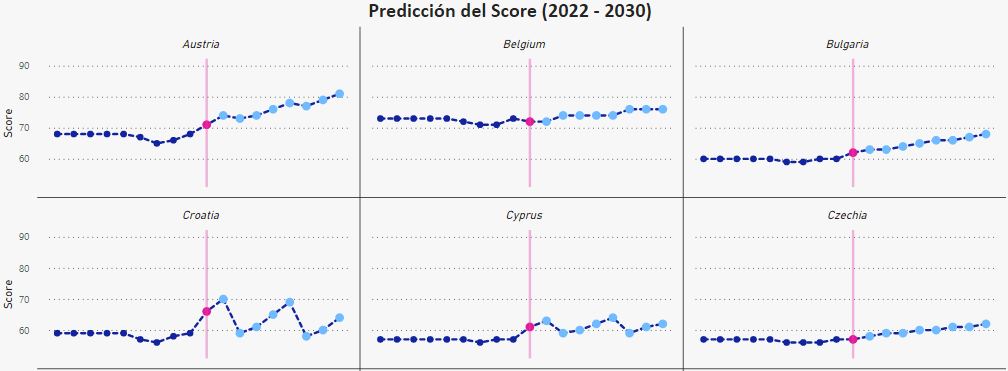
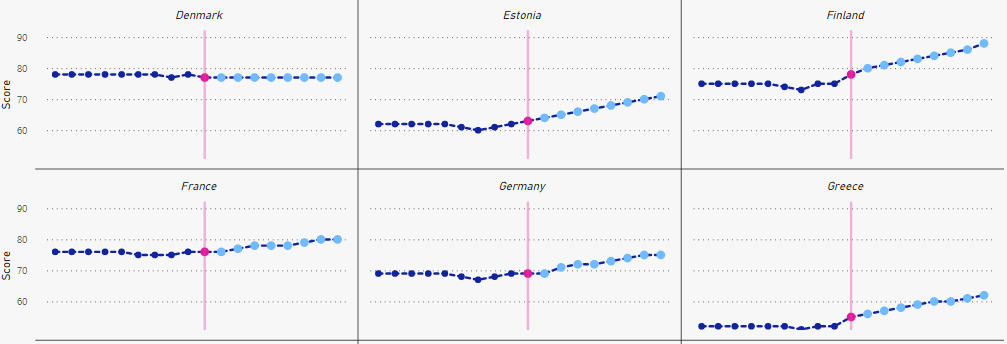
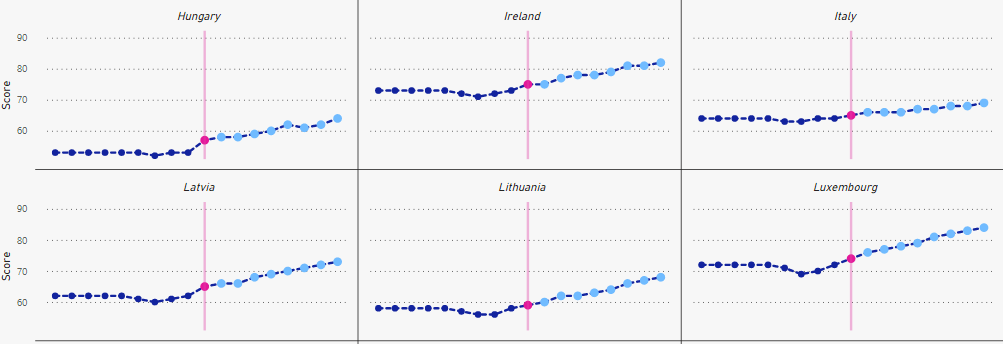
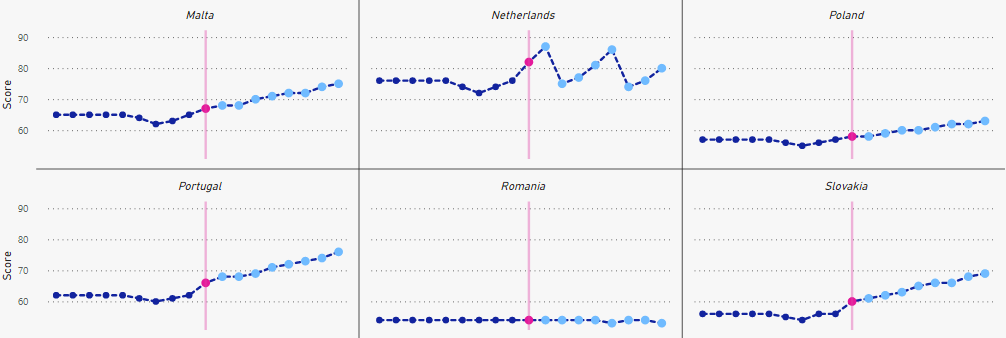
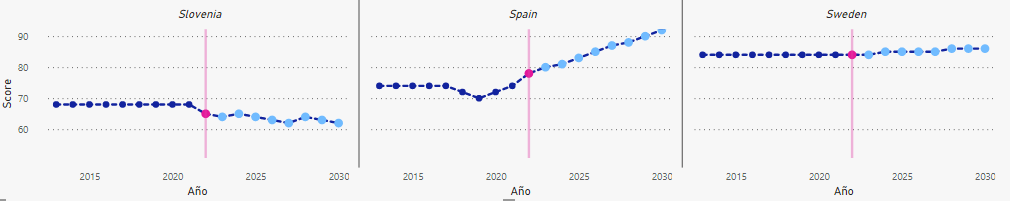

## 6.CONCLUSIONES

El Data set que tenemos para el análisis tiene pocos datos necesarios para poder obtener una buena predicción.
Utilizamos el prophet model porque tenemos pocos datos y necesitamos predecir un periodo de años del 2021 al 2030.

